### Import required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as g

from neuronunit.neuron.models import *
from neuronunit.tests import *
import neuronunit.neuroelectro
from quantities import nA, pA, s, ms, mV

from neuron import h

# DEBUG TESTING
#from importlib import *
#import neuronunit
#reload(neuronunit.neuron.models)
#from neuronunit.neuron.models import *

### Create a simple HH cell in NEURON

In [2]:
soma = h.Section()
soma.L = 100
soma.diam = 100
soma.cm = 1
soma.Ra = 180
soma.insert("pas")
soma.insert("hh")

### Create a NeuronUnit model using the cell

In [3]:
mod1 = SingleCellModel(hVar = h, \
                       section = soma, \
                       loc = 0.5, # Current and voltage injection and measurement location on the section \
                       name = "SimpleHHCellModel")

mod1.setIntegrationMethod("fixed")  # Or "variable"
mod1.setTimeStep(1/128.0 * ms) # 2^-n are preferable
#mod1.setTolerance() # Only needed if "variable"
mod1.setStopTime(2*s)

### Set up current stimulation

In [4]:
i = {'amplitude': 10*nA, 'delay': 1*s, 'duration': 1*ms}

### See the effects of the current

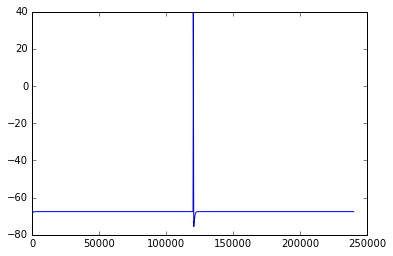

In [5]:
mod1.inject_square_current({'amplitude': 10*nA, 'delay': 1*s, 'duration': 1*ms})

g.plot(mod1.get_membrane_potential())

### And an AP waveform

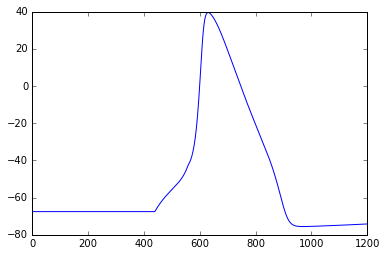

In [6]:
g.plot(mod1.get_APs()[0])

### Create a suite of tests with expected observations

In [7]:
t1 = neuronunit.tests.APWidthTest({ 'mean': 1.5*ms, 'std': 0.5*ms }) # Example values
t2 = neuronunit.tests.RestingPotentialTest({ 'mean': -67*mV, 'std': 5*mV })

suite = sciunit.TestSuite("SimpleTestSuite",[t1,t2])

### Evaluate the model with the test suite

In [8]:
score = suite.judge(mod1)
score.view()

A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation


/usr/local/lib/python2.7/site-packages/beautifulsoup4-4.4.1-py2.7.egg/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")



,AP width,Resting potential
SimpleHHCellModel,Z = 0.15,Z = -0.11


### Define tests to run

In [9]:
# Define which cell's properties to get
# 'nlx_anat_100201' is from Olfactory bulb mitral cell, 
# obtained from http://neuroelectro.org/neuron/129/ (Details)
neuron = {'nlex_id': 'nlx_anat_100201'} 

# Define injection current
i = {'injected_square_current': {'amplitude':10*nA, 'delay':1000*ms, 'duration':2000*ms } }

# Define the tests to perform on the cell
testTypes = [ \
    [InputResistanceTest, None],
    [RestingPotentialTest, None],
    [InjectedCurrentAPWidthTest, i], \
    [InjectedCurrentAPThresholdTest, i], \
    [InjectedCurrentAPAmplitudeTest, i],
]
     
     

tests = []

### Obtain Property Values (observations) from NeuroElectro.org

In [10]:
# Fetch NeuroElectro property values for each test
for t in xrange(len(testTypes)):
    testType = testTypes[t][0]
    params = testTypes[t][1]
    
    # Get the observations: property means and stds
    obs = testType.neuroelectro_summary_observation(neuron)
    
    # Create a test instance using the observations
    test = testType(obs)
    
    if(params is not None):
        test.params = params
    
    tests.append(test)
    
# Create a test suite    
suite = sciunit.TestSuite("Mitral Cell Membrane Property Tests", tests)

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nlx_anat_100201&e__name=Input+Resistance
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nlx_anat_100201&e__name=Resting+membrane+potential
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nlx_anat_100201&e__name=Spike+Half-Width
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nlx_anat_100201&e__name=Spike+Threshold
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nlx_anat_100201&e__name=Spike+Amplitude


### Evaluate the model

In [11]:
score = suite.judge(mod1)
score.view()

A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation


,Input resistance,Resting potential,Injected current AP width,Injected current AP threshold,Injected current AP amplitude
SimpleHHCellModel,Z = -1.63,Z = -1.75,Z = -1.35,Z = -3.22,Z = 9.26
